In [ ]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df = pd.read_csv('https://raw.githubusercontent.com/goldenPheonix02/aiml-capstone-project/main/data.csv', delimiter='\t')

In [ ]:
df.head()

,Q1A,Q1I,Q1E,Q2A,Q2I,Q2E,Q3A,Q3I,Q3E,Q4A,...,screensize,uniquenetworklocation,hand,religion,orientation,race,voted,married,familysize,major
0,4,28,3890,4,25,2122,2,16,1944,4,...,1,1,1,12,1,10,2,1,2,NaN
1,4,2,8118,1,36,2890,2,35,4777,3,...,2,1,2,7,0,70,2,1,4,NaN
2,3,7,5784,1,33,4373,4,41,3242,1,...,2,1,1,4,3,60,1,1,3,NaN
3,2,23,5081,3,11,6837,2,37,5521,1,...,2,1,2,4,5,70,2,1,5,biology
4,2,36,3215,2,13,7731,3,5,4156,4,...,2,2,3,10,1,10,2,1,4,Psychology


In [ ]:
df.shape

(39775, 172)

In [ ]:
removedFeatures = [f'Q{i}E' for i in range(1, 43)] # add feature 'Q1E' to 'Q42E' to be removed
removedFeatures.extend([f'Q{i}I' for i in range(1, 43)]) # add feature 'Q1E' to 'Q42E' to be removed
removedFeatures.extend([f'VCL{i}' for i in range(1, 17)]) # add feature 'VCL1' to 'VCL16' to be removed
removedFeatures.extend([ 'source', 'introelapse', 'testelapse', 'surveyelapse', 'engnat', 'hand', 'religion', 'orientation',
    'voted', 'country', 'screensize', 'uniquenetworklocation','major'])

# remove features from the dataset
depression = df.drop(removedFeatures, axis=1)
depression.columns

Index(['Q1A', 'Q2A', 'Q3A', 'Q4A', 'Q5A', 'Q6A', 'Q7A', 'Q8A', 'Q9A', 'Q10A',
       'Q11A', 'Q12A', 'Q13A', 'Q14A', 'Q15A', 'Q16A', 'Q17A', 'Q18A', 'Q19A',
       'Q20A', 'Q21A', 'Q22A', 'Q23A', 'Q24A', 'Q25A', 'Q26A', 'Q27A', 'Q28A',
       'Q29A', 'Q30A', 'Q31A', 'Q32A', 'Q33A', 'Q34A', 'Q35A', 'Q36A', 'Q37A',
       'Q38A', 'Q39A', 'Q40A', 'Q41A', 'Q42A', 'TIPI1', 'TIPI2', 'TIPI3',
       'TIPI4', 'TIPI5', 'TIPI6', 'TIPI7', 'TIPI8', 'TIPI9', 'TIPI10',
       'education', 'urban', 'gender', 'age', 'race', 'married', 'familysize'],
      dtype='object')

In [ ]:
qnum = [f'Q{i}A' for i in range(1, 43)]
for i in range(0,42):
  depression[qnum[i]] = depression[qnum[i]] - 1

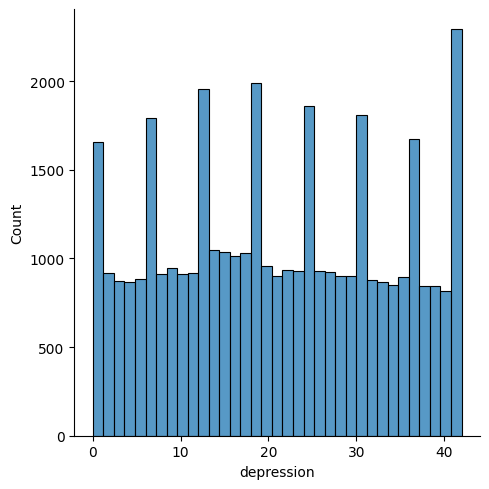

In [ ]:
# depression
dqnum = ['Q3A', 'Q5A', 'Q10A', 'Q13A', 'Q16A', 'Q17A', 'Q21A', 'Q24A', 'Q26A', 'Q31A', 'Q34A', 'Q37A', 'Q38A', 'Q42A']
depression['depression'] = depression.loc[:,dqnum].sum(axis=1)
depression['depression']

sns.displot(x=depression['depression'])


Index(['Q1A', 'Q2A', 'Q3A', 'Q4A', 'Q5A', 'Q6A', 'Q7A', 'Q8A', 'Q9A', 'Q10A',
       'Q11A', 'Q12A', 'Q13A', 'Q14A', 'Q15A', 'Q16A', 'Q17A', 'Q18A', 'Q19A',
       'Q20A', 'Q21A', 'Q22A', 'Q23A', 'Q24A', 'Q25A', 'Q26A', 'Q27A', 'Q28A',
       'Q29A', 'Q30A', 'Q31A', 'Q32A', 'Q33A', 'Q34A', 'Q35A', 'Q36A', 'Q37A',
       'Q38A', 'Q39A', 'Q40A', 'Q41A', 'Q42A', 'TIPI1', 'TIPI2', 'TIPI3',
       'TIPI4', 'TIPI5', 'TIPI6', 'TIPI7', 'TIPI8', 'TIPI9', 'TIPI10',
       'education', 'urban', 'gender', 'age', 'race', 'married', 'familysize',
       'depression', 'anxiety'],
      dtype='object')

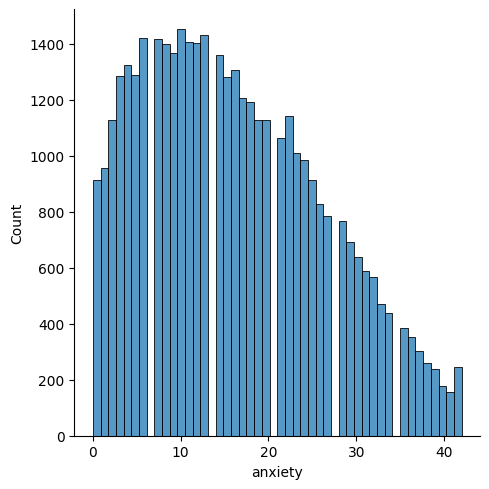

In [ ]:
# anxiety
aqnum = ['Q2A', 'Q4A', 'Q7A', 'Q9A', 'Q15A', 'Q19A', 'Q20A', 'Q23A', 'Q25A', 'Q28A', 'Q30A', 'Q36A', 'Q40A', 'Q41A']
depression['anxiety'] = depression.loc[:,aqnum].sum(axis=1)
depression['anxiety']

sns.displot(x=depression['anxiety'])
depression.columns

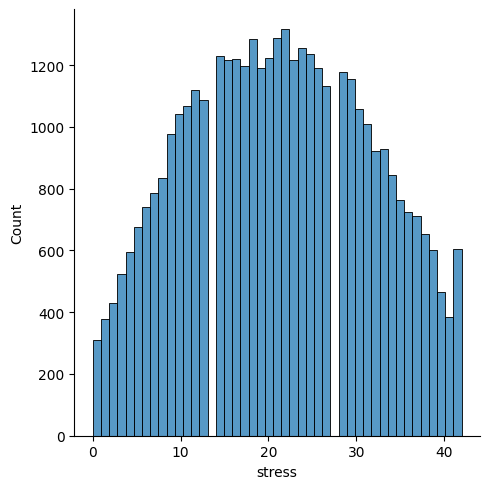

In [ ]:
# stress
sqnum = ['Q1A', 'Q6A', 'Q8A', 'Q11A', 'Q12A', 'Q14A', 'Q18A', 'Q22A', 'Q27A', 'Q29A', 'Q32A', 'Q33A', 'Q35A', 'Q39A']
depression['stress'] = depression.loc[:,sqnum].sum(axis=1)

sns.displot(x=depression['stress'])

In [ ]:
def anxietyLabel(value):
    if value >=0 and value<=7:
        return 'Normal'
    if 8 <= value <= 9 :
        return 'Mild'
    if 10 <= value <= 14:
        return 'Moderate'
    if 15 <= value <= 19:
        return 'Severe'
    if value >= 20:
        return 'Extremely Severe'

def stressLabel(value):
    if value >=0 and value<=14:
        return 'Normal'
    if 15 <= value <= 18:
        return 'Mild'
    if 19 <= value <= 25:
        return 'Moderate'
    if 26 <= value <= 33:
        return 'Severe'
    if value >= 34:
        return 'Extremely Severe'

def depressionLabel(value):
    if value >=0 and value<=9:
        return 'Normal'
    if 10 <= value <= 13 :
        return 'Mild'
    if 14 <= value <= 20:
        return 'Moderate'
    if 21 <= value <= 27:
        return 'Severe'
    if value >= 28:
        return 'Extremely Severe'

depression['a_label'] = depression['anxiety'].apply(anxietyLabel)
depression['s_label'] = depression['stress'].apply(stressLabel)
depression['d_label'] = depression['depression'].apply(depressionLabel)

In [ ]:
depression[dqnum]

,Q3A,Q5A,Q10A,Q13A,Q16A,Q17A,Q21A,Q24A,Q26A,Q31A,Q34A,Q37A,Q38A,Q42A
0,1,3,0,3,3,2,0,3,3,3,2,0,1,3
1,1,3,1,3,2,3,1,1,2,1,1,3,1,1
2,3,3,3,3,3,3,3,3,0,3,3,3,3,3
3,1,2,2,0,1,2,0,0,1,2,3,1,0,1
4,2,3,2,3,2,3,2,1,3,2,3,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39770,2,2,3,3,2,3,3,2,2,3,3,3,3,2
39771,2,2,3,3,3,2,3,3,3,3,3,2,3,3
39772,1,0,0,1,0,0,0,1,0,1,0,0,0,0
39773,1,2,0,3,0,1,1,1,2,1,1,0,1,2


<Axes: xlabel='d_label', ylabel='count'>

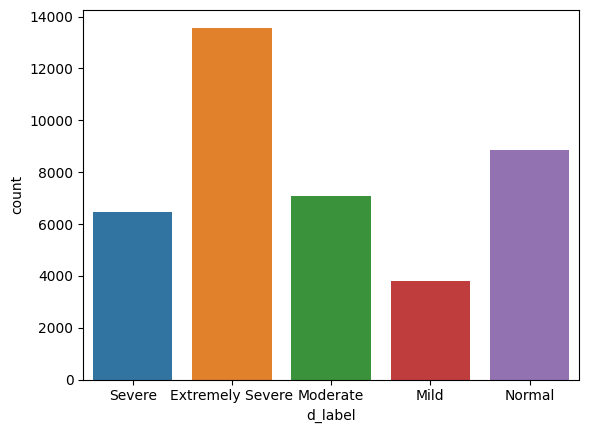

In [ ]:
sns.countplot(x=depression['d_label'])

In [ ]:
depression.head()

,Q1A,Q2A,Q3A,Q4A,Q5A,Q6A,Q7A,Q8A,Q9A,Q10A,...,age,race,married,familysize,depression,anxiety,stress,a_label,s_label,d_label
0,3,3,1,3,3,3,3,3,1,0,...,16,10,1,2,27,34,40,Extremely Severe,Extremely Severe,Severe
1,3,0,1,2,3,3,2,3,2,1,...,16,70,1,4,24,17,27,Severe,Severe,Severe
2,2,0,3,0,3,2,0,2,1,3,...,17,60,1,3,39,12,17,Moderate,Mild,Extremely Severe
3,1,2,1,0,2,2,3,1,2,2,...,13,70,1,5,16,17,16,Severe,Mild,Moderate
4,1,1,2,3,3,1,3,3,3,2,...,19,10,1,4,32,40,29,Extremely Severe,Severe,Extremely Severe


In [ ]:
depression.columns

Index(['Q1A', 'Q2A', 'Q3A', 'Q4A', 'Q5A', 'Q6A', 'Q7A', 'Q8A', 'Q9A', 'Q10A',
       'Q11A', 'Q12A', 'Q13A', 'Q14A', 'Q15A', 'Q16A', 'Q17A', 'Q18A', 'Q19A',
       'Q20A', 'Q21A', 'Q22A', 'Q23A', 'Q24A', 'Q25A', 'Q26A', 'Q27A', 'Q28A',
       'Q29A', 'Q30A', 'Q31A', 'Q32A', 'Q33A', 'Q34A', 'Q35A', 'Q36A', 'Q37A',
       'Q38A', 'Q39A', 'Q40A', 'Q41A', 'Q42A', 'TIPI1', 'TIPI2', 'TIPI3',
       'TIPI4', 'TIPI5', 'TIPI6', 'TIPI7', 'TIPI8', 'TIPI9', 'TIPI10',
       'education', 'urban', 'gender', 'age', 'race', 'married', 'familysize',
       'depression', 'anxiety', 'stress', 'a_label', 's_label', 'd_label'],
      dtype='object')

## Analysis of data


In [ ]:
depression.columns

Index(['Q1A', 'Q2A', 'Q3A', 'Q4A', 'Q5A', 'Q6A', 'Q7A', 'Q8A', 'Q9A', 'Q10A',
       'Q11A', 'Q12A', 'Q13A', 'Q14A', 'Q15A', 'Q16A', 'Q17A', 'Q18A', 'Q19A',
       'Q20A', 'Q21A', 'Q22A', 'Q23A', 'Q24A', 'Q25A', 'Q26A', 'Q27A', 'Q28A',
       'Q29A', 'Q30A', 'Q31A', 'Q32A', 'Q33A', 'Q34A', 'Q35A', 'Q36A', 'Q37A',
       'Q38A', 'Q39A', 'Q40A', 'Q41A', 'Q42A', 'TIPI1', 'TIPI2', 'TIPI3',
       'TIPI4', 'TIPI5', 'TIPI6', 'TIPI7', 'TIPI8', 'TIPI9', 'TIPI10',
       'education', 'urban', 'gender', 'age', 'race', 'married', 'familysize',
       'depression', 'anxiety', 'stress', 'a_label', 's_label', 'd_label'],
      dtype='object')

1.Education *feature*

In [ ]:
depression['familysize'].value_counts()

3      9206
2      9018
4      7539
5      4830
1      2946
6      2450
7      1243
0      1125
8       676
9       331
10      195
11      109
12       56
13       19
14        8
15        6
16        5
17        3
24        1
23        1
21        1
19        1
62        1
26        1
65        1
54        1
99        1
133       1
Name: familysize, dtype: int64

<ipython-input-17-5b4a6c197b5b>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x=depression['familysize'])


<Axes: ylabel='Density'>

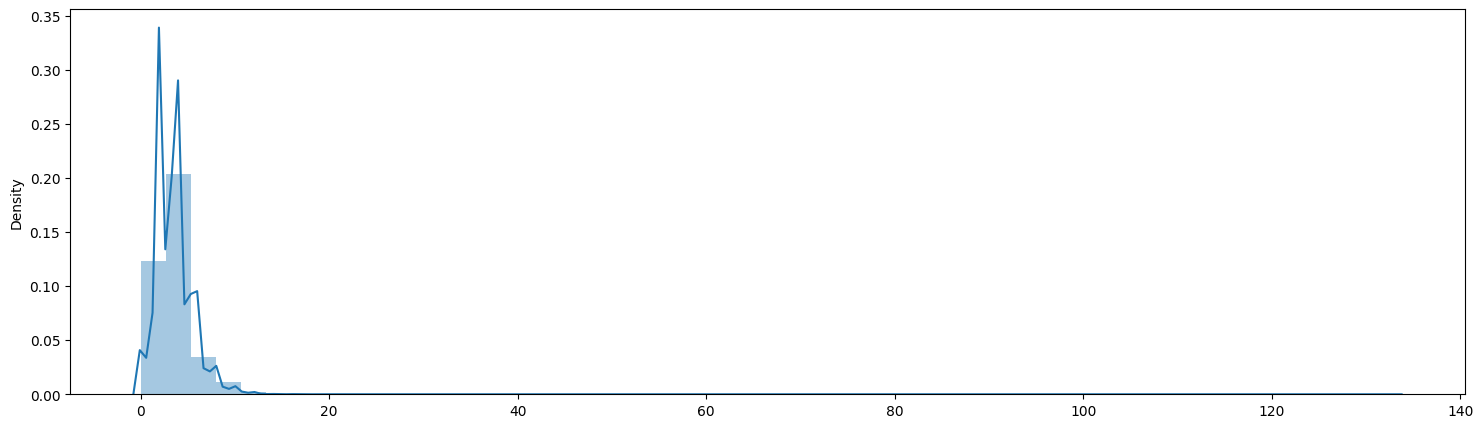

In [ ]:
plt.figure(figsize=(18, 5))
sns.distplot(x=depression['familysize'])

It seems that there are outliers, so we'll remove records that has familysize more than 13

In [ ]:
# remove reocrds that has family size more than 13
indexes = depression[depression['familysize'] > 13].index

# reomve these indexes from dataframe
print(f'Depression size before: {depression.shape[0]}')
depression = depression.drop(indexes, axis=0)
print(f'Depression size after: {depression.shape[0]}')

Depression size before: 39775
Depression size after: 39743


<ipython-input-19-5b4a6c197b5b>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x=depression['familysize'])


<Axes: ylabel='Density'>

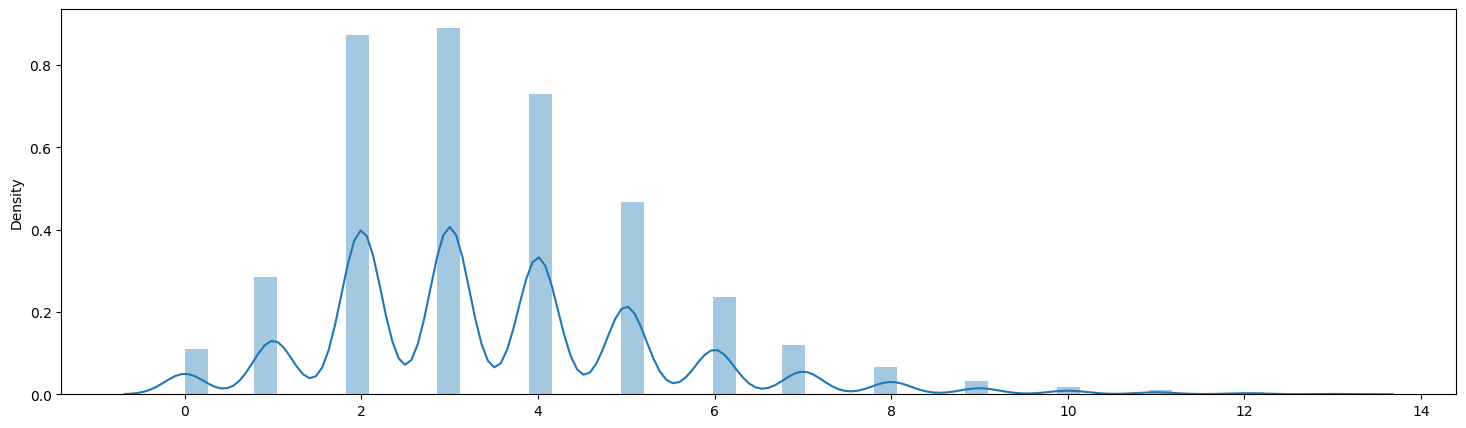

In [ ]:
plt.figure(figsize=(18, 5))
sns.distplot(x=depression['familysize'])

most people who participated in the survey never married, so let's change 0 value to 1 since 0 means null here

people who didn't answer this question the survey describe it as 0 value

<Axes: xlabel='married', ylabel='count'>

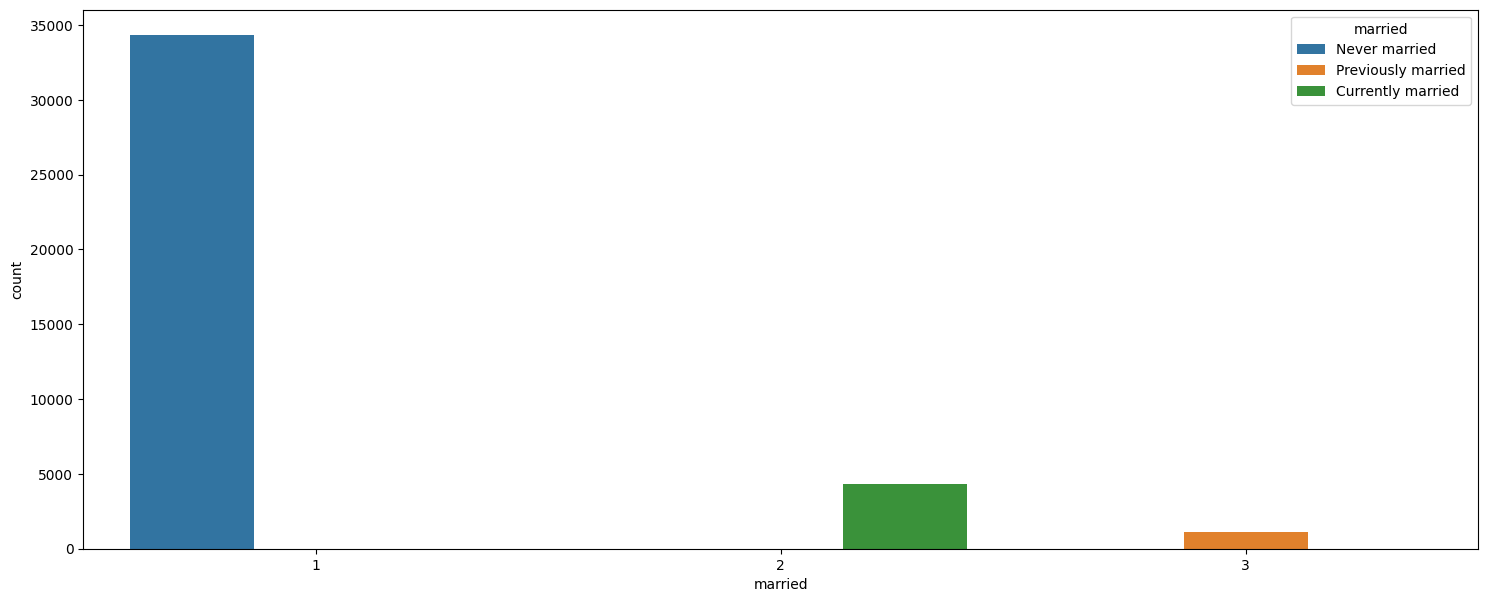

In [ ]:
def change0to1inMarried(value):
    if value == 0:
        return 1
    return value

# change 0 to 1 value as it is the most answered one
depression['married'] = depression['married'].apply(change0to1inMarried)

def changeMarriedValueToString(value):
    if value == 1:
        return 'Never married'
    if value == 2:
        return 'Currently married'
    if value == 3:
        return 'Previously married'
    return value

# change numbers to strings for better viz
married = depression['married'].apply(changeMarriedValueToString)


plt.figure(figsize=(18, 7))
sns.countplot(x=depression['married'], hue=married)

20      3788
21      3532
19      3506
18      3045
22      3006
        ... 
89         1
1996       1
223        1
78         1
1991       1
Name: age, Length: 78, dtype: int64

<Axes: xlabel='age'>

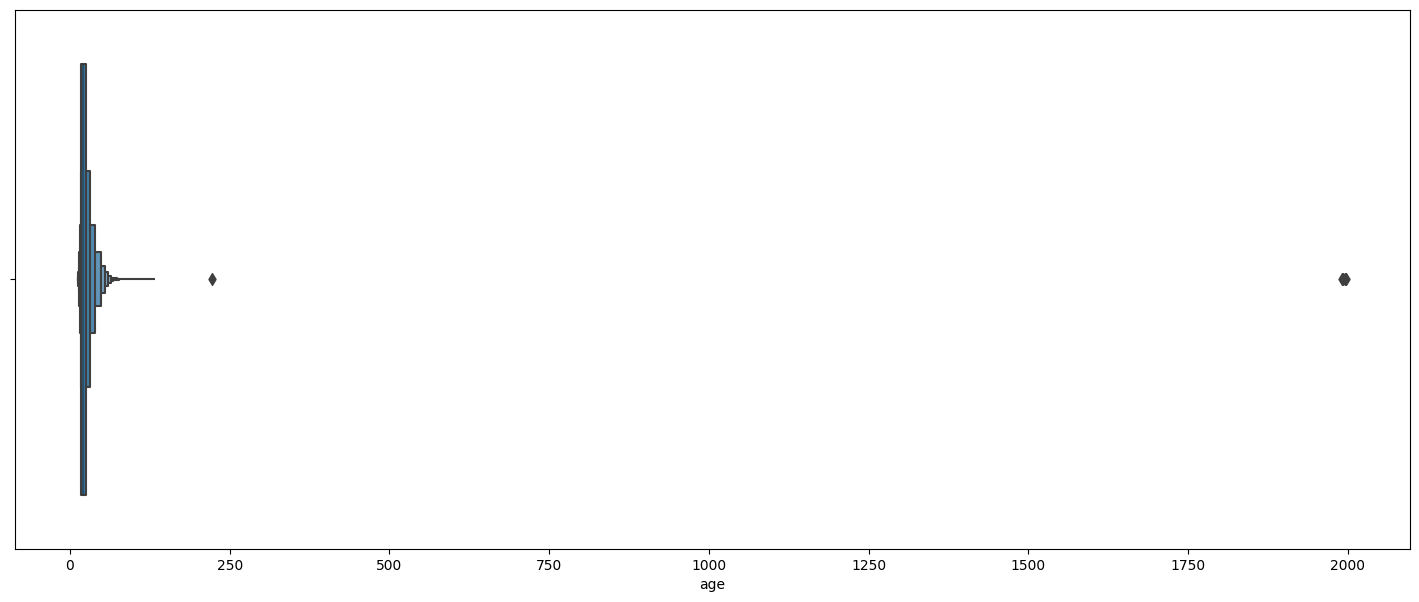

In [ ]:
display(depression['age'].value_counts())

# show viz
plt.figure(figsize=(18, 7))
sns.boxenplot(x=depression['age'])

It seems that there are outliers that need to be removed


In [ ]:
# remove age > 80 years old

age_indexes = depression[depression['age'] > 80]['age'].index

display(age_indexes) # figure out how many

# remove these indexes
print(f'Depression size before: {depression.shape[0]}')
depression.drop(age_indexes, axis=0, inplace=True)
print(f'Depression size after: {depression.shape[0]}')

Int64Index([527, 5340, 10231, 10878, 14236, 14367, 21383, 24898, 30027, 33730], dtype='int64')

Depression size before: 39743
Depression size after: 39733


<Axes: xlabel='age'>

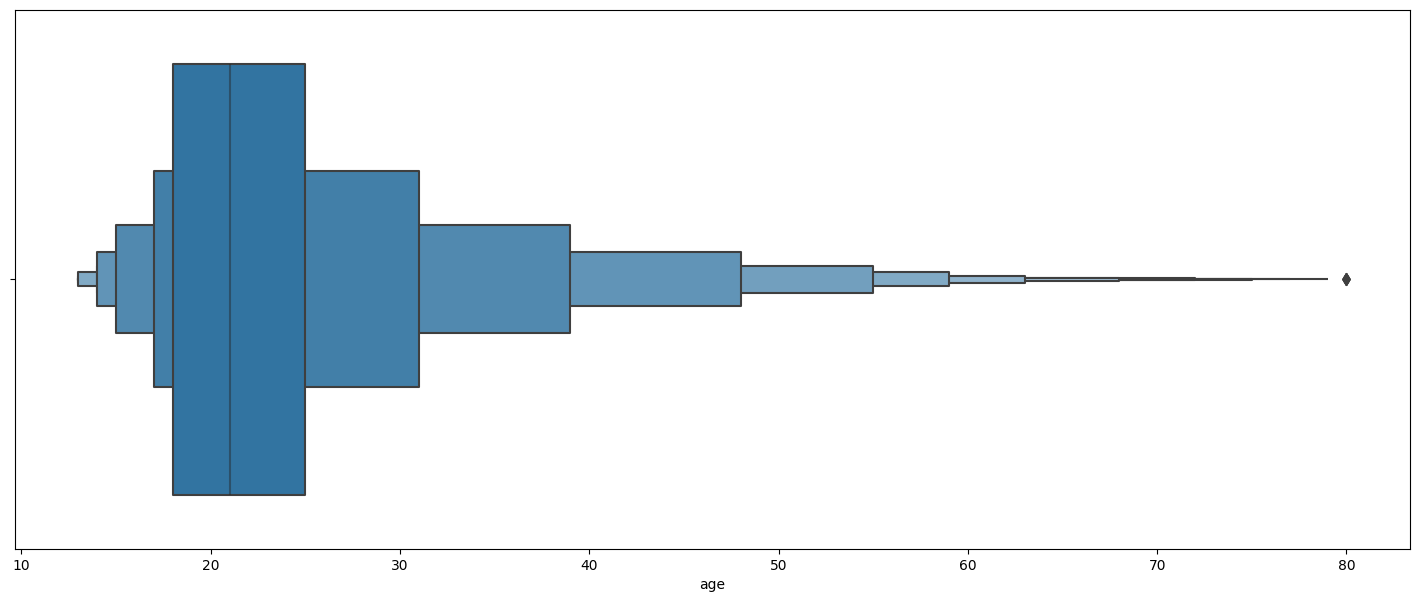

In [ ]:
plt.figure(figsize=(18, 7))
sns.boxenplot(x=depression['age'])

Now let's create age_group feature to range the people ages and drop age feature

<Axes: xlabel='age', ylabel='count'>

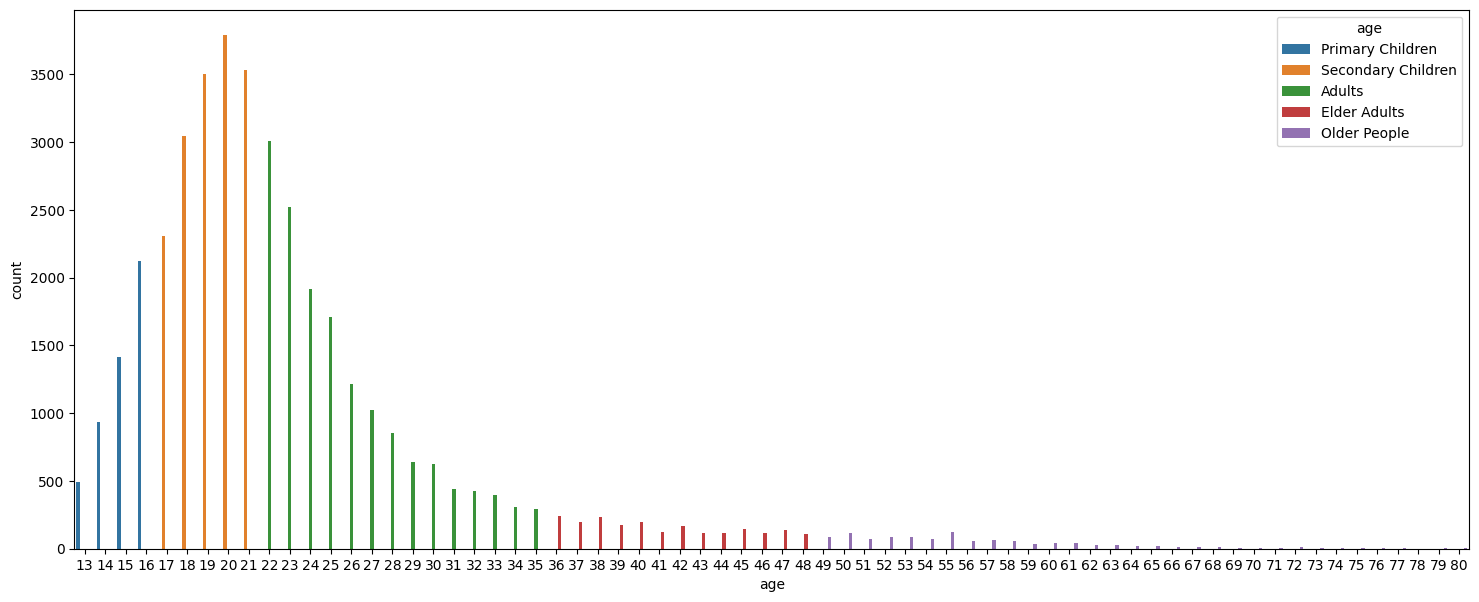

In [ ]:
def makeAgeGroup(value):
    if value <= 10:
        return 'Under 10'
    if  10 <= value <= 16:
        return 'Primary Children'
    if 17 <= value <= 21:
        return 'Secondary Children'
    if 21 <= value <= 35:
        return 'Adults'
    if 36 <= value <= 48:
        return 'Elder Adults'
    if value >= 49:
        return 'Older People'

age = depression['age'].apply(makeAgeGroup)

plt.figure(figsize=(18, 7))
sns.countplot(x=depression['age'], hue=age)

It seems that the most people who participated in the survey are Secondary and Adults

In [ ]:
# create age_group feature
def makeAgeGroupFeature(value):
    if value <= 10:
        return 1
    if  10 <= value <= 16:
        return 2
    if 17 <= value <= 21:
        return 3
    if 21 <= value <= 35:
        return 4
    if 36 <= value <= 48:
        return 5
    if value >= 49:
        return 6

depression['age_group'] = depression['age'].apply(makeAgeGroupFeature)

depression.head()

,Q1A,Q2A,Q3A,Q4A,Q5A,Q6A,Q7A,Q8A,Q9A,Q10A,...,race,married,familysize,depression,anxiety,stress,a_label,s_label,d_label,age_group
0,3,3,1,3,3,3,3,3,1,0,...,10,1,2,27,34,40,Extremely Severe,Extremely Severe,Severe,2
1,3,0,1,2,3,3,2,3,2,1,...,70,1,4,24,17,27,Severe,Severe,Severe,2
2,2,0,3,0,3,2,0,2,1,3,...,60,1,3,39,12,17,Moderate,Mild,Extremely Severe,3
3,1,2,1,0,2,2,3,1,2,2,...,70,1,5,16,17,16,Severe,Mild,Moderate,2
4,1,1,2,3,3,1,3,3,3,2,...,10,1,4,32,40,29,Extremely Severe,Severe,Extremely Severe,3


In [ ]:
depression.drop('age', axis=1, inplace=True)
depression.head()

,Q1A,Q2A,Q3A,Q4A,Q5A,Q6A,Q7A,Q8A,Q9A,Q10A,...,race,married,familysize,depression,anxiety,stress,a_label,s_label,d_label,age_group
0,3,3,1,3,3,3,3,3,1,0,...,10,1,2,27,34,40,Extremely Severe,Extremely Severe,Severe,2
1,3,0,1,2,3,3,2,3,2,1,...,70,1,4,24,17,27,Severe,Severe,Severe,2
2,2,0,3,0,3,2,0,2,1,3,...,60,1,3,39,12,17,Moderate,Mild,Extremely Severe,3
3,1,2,1,0,2,2,3,1,2,2,...,70,1,5,16,17,16,Severe,Mild,Moderate,2
4,1,1,2,3,3,1,3,3,3,2,...,10,1,4,32,40,29,Extremely Severe,Severe,Extremely Severe,3


In [ ]:
depression.drop(['depression','anxiety','stress'],axis=1,inplace=True)
depression.head()

,Q1A,Q2A,Q3A,Q4A,Q5A,Q6A,Q7A,Q8A,Q9A,Q10A,...,education,urban,gender,race,married,familysize,a_label,s_label,d_label,age_group
0,3,3,1,3,3,3,3,3,1,0,...,2,3,2,10,1,2,Extremely Severe,Extremely Severe,Severe,2
1,3,0,1,2,3,3,2,3,2,1,...,2,3,2,70,1,4,Severe,Severe,Severe,2
2,2,0,3,0,3,2,0,2,1,3,...,2,3,2,60,1,3,Moderate,Mild,Extremely Severe,3
3,1,2,1,0,2,2,3,1,2,2,...,1,3,2,70,1,5,Severe,Mild,Moderate,2
4,1,1,2,3,3,1,3,3,3,2,...,3,2,2,10,1,4,Extremely Severe,Severe,Extremely Severe,3


In [ ]:
dqnum.append('d_label')
aqnum.append('a_label')
sqnum.append('s_label')

In [ ]:
anxiety=depression.drop(np.concatenate((dqnum, sqnum)),axis=1)
anxiety.head()

,Q2A,Q4A,Q7A,Q9A,Q15A,Q19A,Q20A,Q23A,Q25A,Q28A,...,TIPI9,TIPI10,education,urban,gender,race,married,familysize,a_label,age_group
0,3,3,3,1,3,2,2,3,3,2,...,1,1,2,3,2,10,1,2,Extremely Severe,2
1,0,2,2,2,2,0,0,0,1,3,...,1,5,2,3,2,70,1,4,Severe,2
2,0,0,0,1,3,1,0,1,1,0,...,3,2,2,3,2,60,1,3,Moderate,3
3,2,0,3,2,1,0,1,0,0,0,...,6,1,1,3,2,70,1,5,Severe,2
4,1,3,3,3,3,3,3,3,3,3,...,3,3,3,2,2,10,1,4,Extremely Severe,3


In [ ]:
stress=depression.drop(np.concatenate((dqnum, aqnum)),axis=1)
stress.head()

,Q1A,Q6A,Q8A,Q11A,Q12A,Q14A,Q18A,Q22A,Q27A,Q29A,...,TIPI9,TIPI10,education,urban,gender,race,married,familysize,s_label,age_group
0,3,3,3,3,3,3,3,3,3,3,...,1,1,2,3,2,10,1,2,Extremely Severe,2
1,3,3,3,1,1,3,1,2,2,2,...,1,5,2,3,2,70,1,4,Severe,2
2,2,2,2,1,0,0,1,2,1,1,...,3,2,2,3,2,60,1,3,Mild,3
3,1,2,1,1,0,3,0,0,3,2,...,6,1,1,3,2,70,1,5,Mild,2
4,1,1,3,1,3,3,3,2,1,1,...,3,3,3,2,2,10,1,4,Severe,3


In [ ]:
depression.drop(np.concatenate((sqnum, aqnum)),axis=1,inplace=  True)
depression.head()
depression.columns

Index(['Q3A', 'Q5A', 'Q10A', 'Q13A', 'Q16A', 'Q17A', 'Q21A', 'Q24A', 'Q26A',
       'Q31A', 'Q34A', 'Q37A', 'Q38A', 'Q42A', 'TIPI1', 'TIPI2', 'TIPI3',
       'TIPI4', 'TIPI5', 'TIPI6', 'TIPI7', 'TIPI8', 'TIPI9', 'TIPI10',
       'education', 'urban', 'gender', 'race', 'married', 'familysize',
       'd_label', 'age_group'],
      dtype='object')

In [ ]:
depression.describe()

,Q3A,Q5A,Q10A,Q13A,Q16A,Q17A,Q21A,Q24A,Q26A,Q31A,...,TIPI8,TIPI9,TIPI10,education,urban,gender,race,married,familysize,age_group
count,39733.000000,39733.000000,39733.000000,39733.000000,39733.000000,39733.000000,39733.000000,39733.000000,39733.000000,39733.000000,...,39733.000000,39733.000000,39733.000000,39733.000000,39733.000000,39733.000000,39733.000000,39733.000000,39733.000000,39733.000000
mean,1.226034,1.521380,1.447361,1.784512,1.519618,1.658722,1.349533,1.436916,1.658621,1.376664,...,4.281177,3.649510,3.730979,2.503637,2.220774,1.789495,31.322327,1.164297,3.491556,3.453276
std,1.038582,1.069976,1.139486,1.073872,1.110818,1.157033,1.166171,1.050798,1.066635,1.043753,...,1.968880,1.830375,1.864019,0.885336,0.804532,0.444134,25.873896,0.438262,1.889692,0.880229
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,10.000000,1.000000,0.000000,2.000000
25%,0.000000,1.000000,0.000000,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,...,3.000000,2.000000,2.000000,2.000000,2.000000,2.000000,10.000000,1.000000,2.000000,3.000000
50%,1.000000,1.000000,1.000000,2.000000,1.000000,2.000000,1.000000,1.000000,2.000000,1.000000,...,5.000000,4.000000,4.000000,3.000000,2.000000,2.000000,10.000000,1.000000,3.000000,3.000000
75%,2.000000,2.000000,3.000000,3.000000,3.000000,3.000000,2.000000,2.000000,3.000000,2.000000,...,6.000000,5.000000,5.000000,3.000000,3.000000,2.000000,60.000000,1.000000,4.000000,4.000000
max,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,...,7.000000,7.000000,7.000000,4.000000,3.000000,3.000000,70.000000,3.000000,13.000000,6.000000


## Depression Model

In [ ]:
# split target from depression dataset
target_depression = depression['d_label']
depression.drop(['d_label'], axis=1, inplace=True) # drop target and total_count

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(depression, target_depression, test_size=.2)

print(f'x_train: {x_train.shape}, y_train: {y_train.shape}')
print(f'x_test: {x_test.shape}, y_test: {y_test.shape}')

x_train: (31786, 31), y_train: (31786,)
x_test: (7947, 31), y_test: (7947,)


In [ ]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler

scaler = MinMaxScaler()

x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

In [ ]:
%%time
from sklearn.svm import SVC

svc_depression = SVC()

svc_depression.fit(x_train_scaled, y_train)

CPU times: user 11.4 s, sys: 261 ms, total: 11.7 s
Wall time: 21.2 s


SVC()

In [ ]:
from sklearn.model_selection import cross_val_score

cross_score = cross_val_score(svc_depression, x_train_scaled, y_train, cv=5)
print(f'Mean Score {np.mean(cross_score)}')

Mean Score 0.9915371457817379


## Anxiety Model

In [ ]:
# split target from anxiety dataset
target_anxiety = anxiety['a_label']
anxiety.drop(['a_label'], axis=1, inplace=True) # drop target and total_count

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(anxiety, target_anxiety, test_size=.2)

print(f'x_train: {x_train.shape}, y_train: {y_train.shape}')
print(f'x_test: {x_test.shape}, y_test: {y_test.shape}')

x_train: (31786, 31), y_train: (31786,)
x_test: (7947, 31), y_test: (7947,)


In [ ]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler

scaler = MinMaxScaler()

x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

In [ ]:
%%time
from sklearn.svm import SVC

svc_anxiety = SVC()

svc_anxiety.fit(x_train_scaled, y_train)

CPU times: user 9.94 s, sys: 213 ms, total: 10.2 s
Wall time: 10.2 s


SVC()

In [ ]:
from sklearn.model_selection import cross_val_score

cross_score = cross_val_score(svc_anxiety, x_train_scaled, y_train, cv=5)
print(f'Mean Score {np.mean(cross_score)}')

Mean Score 0.994085468172122


## Stress Model

In [ ]:
# split target from stress dataset
target_stress = stress['s_label']
stress.drop(['s_label'], axis=1, inplace=True) # drop target and total_count

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(anxiety, target_anxiety, test_size=.2)

print(f'x_train: {x_train.shape}, y_train: {y_train.shape}')
print(f'x_test: {x_test.shape}, y_test: {y_test.shape}')

x_train: (31786, 31), y_train: (31786,)
x_test: (7947, 31), y_test: (7947,)


In [ ]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler

scaler = MinMaxScaler()

x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

In [ ]:
%%time
from sklearn.svm import SVC

svc_stress = SVC()

svc_stress.fit(x_train_scaled, y_train)

CPU times: user 10.2 s, sys: 225 ms, total: 10.5 s
Wall time: 10.5 s


SVC()

In [ ]:
from sklearn.model_selection import cross_val_score

cross_score = cross_val_score(svc_stress, x_train_scaled, y_train, cv=5)
print(f'Mean Score {np.mean(cross_score)}')

Mean Score 0.9936764157856566


In [ ]:
import joblib
import pickle


In [ ]:
joblib.dump(svc_stress, 'stress.pkl')
joblib.dump(svc_anxiety, 'anxiety.pkl')
joblib.dump(svc_depression, 'depression.pkl')



['depression.pkl']

In [ ]:
svc_stress.predict([x_test.iloc[100,:]])

array(['Extremely Severe'], dtype=object)

In [ ]:
y_test

7029               Normal
17145    Extremely Severe
22222            Moderate
22244    Extremely Severe
32509              Severe
               ...       
22367            Moderate
13303    Extremely Severe
9031               Normal
4734     Extremely Severe
26161    Extremely Severe
Name: a_label, Length: 7947, dtype: object

In [ ]:
dd = pd.DataFrame({'pred':svc_stress.predict(x_test_scaled)})

In [ ]:
dd['pred'].value_counts()

Extremely Severe    2883
Normal              1865
Moderate            1437
Severe              1203
Mild                 559
Name: pred, dtype: int64

In [ ]:
y_train

37648    Extremely Severe
8051               Normal
38105    Extremely Severe
15296            Moderate
1634             Moderate
               ...       
30504              Severe
2009                 Mild
6429               Severe
38040              Normal
14501                Mild
Name: a_label, Length: 31786, dtype: object

In [ ]:
x_test

,Q2A,Q4A,Q7A,Q9A,Q15A,Q19A,Q20A,Q23A,Q25A,Q28A,...,TIPI8,TIPI9,TIPI10,education,urban,gender,race,married,familysize,age_group
7029,0,0,1,1,0,0,1,0,0,1,...,7,5,4,3,3,2,70,1,5,3
17145,2,3,0,1,3,2,2,0,2,1,...,0,0,0,3,1,2,10,1,6,3
22222,1,0,1,0,1,1,1,0,1,1,...,5,5,5,3,1,2,70,1,3,3
22244,1,2,1,3,1,1,3,3,3,1,...,4,4,6,3,3,2,10,1,4,4
32509,1,0,2,1,1,0,1,1,0,1,...,3,3,7,2,1,2,10,1,7,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22367,1,0,0,1,1,2,0,0,1,0,...,4,5,5,2,2,2,10,1,5,3
13303,3,3,2,2,2,1,1,1,2,1,...,2,6,1,4,3,2,10,2,3,4
9031,1,0,0,0,0,0,0,0,0,0,...,2,5,6,2,2,2,10,1,6,3
4734,3,2,1,2,3,3,1,1,1,2,...,5,2,5,3,1,2,10,1,4,4


In [ ]:
x_train_scaled

array([[1.        , 0.66666667, 0.66666667, ..., 0.        , 0.07692308,
        0.5       ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.46153846,
        0.5       ],
       [1.        , 0.33333333, 0.66666667, ..., 0.        , 0.23076923,
        0.5       ],
       ...,
       [1.        , 0.        , 0.        , ..., 0.        , 0.23076923,
        0.25      ],
       [0.33333333, 0.        , 0.33333333, ..., 0.        , 0.15384615,
        0.25      ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.38461538,
        0.25      ]])

In [ ]:
from sklearn.externals import joblib


ImportError: ignored

In [ ]:
joblib.dump(scaler, "stress_scaler.save")


In [ ]:
x_test